In [2]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.contact.contact_regions_set import ContactRegionParams

import numpy as np
from copy import deepcopy
from IPython.display import HTML
from matplotlib import pyplot as plt


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
logging.getLogger("large_gcs").setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

## StackPush a1 (2 objects)


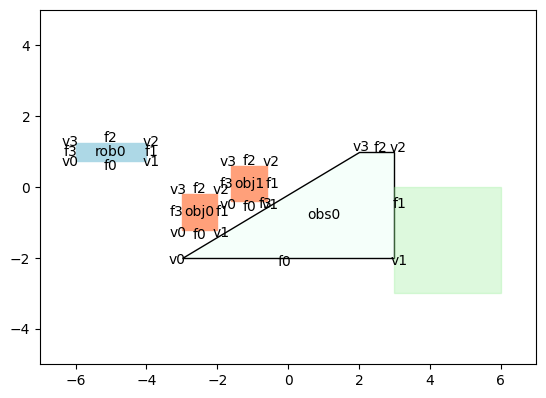

In [3]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [6, 0], [6, -3]], obj_indices=[0, 1]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_a1",
    obs_vertices=[[[-3, -2], [2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [2, 0], [2, 0.5]]],
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1]],
    source_rob_pos=[[-5, 1]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

## StackPush b1 (2 objects)

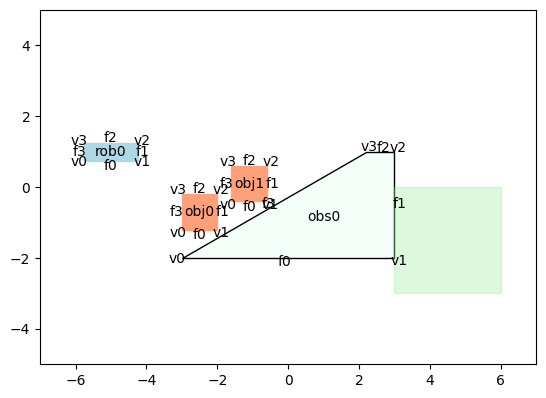

In [6]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [6, 0], [6, -3]], obj_indices=[0, 1]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_b1",
    obs_vertices=[[[-3, -2], [2.2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [1.5, 0], [1.5, 0.5]]],
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1]],
    source_rob_pos=[[-5, 1]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [7]:
generator.generate_incremental_contact_graph()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 37117.73it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 16844.59it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 6 body pairs...
100%|██████████| 6/6 [00:00<00:00, 151.26it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (184)
100%|██████████| 184/184 [00:00<00:00, 4020.23it/s]


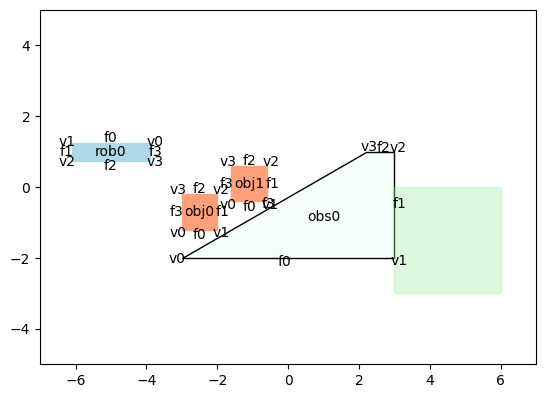

In [4]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [6, 0], [6, -3]], obj_indices=[0, 1]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_c1",
    obs_vertices=[[[-3, -2], [2.2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [2.2, 0], [2.2, 0.5]]],
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1]],
    source_rob_pos=[[-5, 1]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [5]:
generator.generate_incremental_contact_graph()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 45343.83it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 20360.70it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 6 body pairs...
100%|██████████| 6/6 [00:00<00:00, 157.60it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (184)
100%|██████████| 184/184 [00:00<00:00, 3905.63it/s]


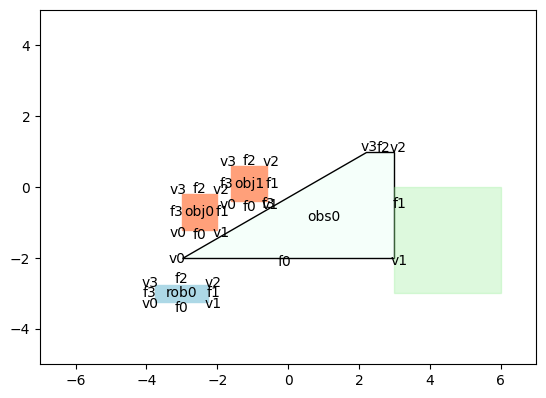

In [16]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [6, 0], [6, -3]], obj_indices=[0, 1]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_d1",
    obs_vertices=[[[-3, -2], [2.2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [1.5, 0], [1.5, 0.5]]] ,
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1]],
    source_rob_pos=[[-5, 1]] + np.array([2, -4]),
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [17]:
generator.generate_incremental_contact_graph()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 50533.78it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 21345.06it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 6 body pairs...
100%|██████████| 6/6 [00:00<00:00, 178.43it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (184)
100%|██████████| 184/184 [00:00<00:00, 4645.27it/s]


## d2

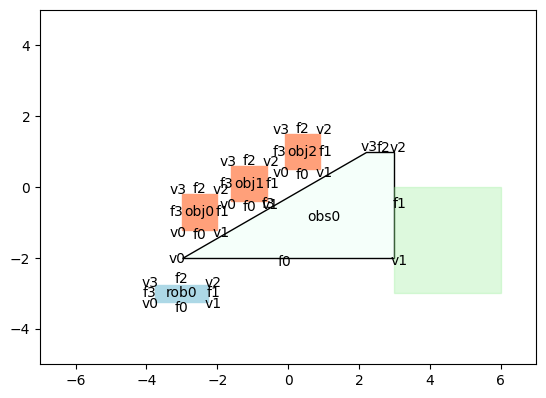

In [21]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [6, 0], [6, -3]], obj_indices=[0, 1, 2]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_d2",
    obs_vertices=[[[-3, -2], [2.2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [1.5, 0], [1.5, 0.5]]] ,
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1], [0.4, 1]],
    source_rob_pos=[[-5, 1]] + np.array([2, -4]),
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [22]:
generator.generate_incremental_contact_graph()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 72315.59it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 33156.55it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 171.79it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (313)
100%|██████████| 313/313 [00:00<00:00, 5913.22it/s]


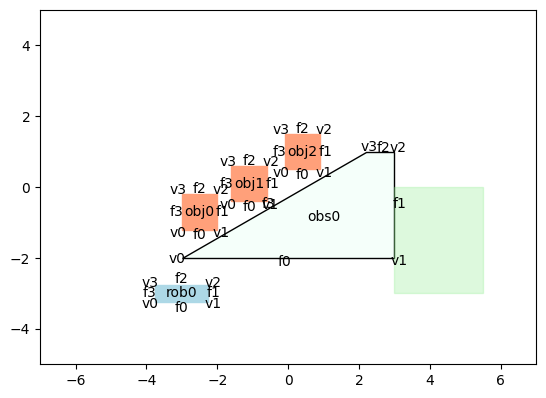

In [23]:
ws_x = 7
ws_y = 5
target_region_params = [
    ContactRegionParams(
        region_vertices=[[3, 0], [3, -3], [5.5, 0], [5.5, -3]], obj_indices=[0, 1, 2]
    ),
]
params = ContactGraphGeneratorParams(
    name="cg_stackpush_e2",
    obs_vertices=[[[-3, -2], [2.2, 1], [3, 1], [3, -2]]],
    obj_vertices=[
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
        [[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]],
    ],
    rob_vertices=[[[0, 0], [0, 0.5], [1.5, 0], [1.5, 0.5]]] ,
    source_obj_pos=[[-2.5, -0.7], [-1.1, 0.1], [0.4, 1]],
    source_rob_pos=[[-5, 1]] + np.array([2, -4]),
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [24]:
generator.generate_incremental_contact_graph()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 47127.01it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 20867.18it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 169.48it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (313)
100%|██████████| 313/313 [00:00<00:00, 5272.63it/s]
